In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
import pandas as pd
import numpy as np

In [3]:
x_train = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_train_inputs.csv')
y_train = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_train_targets.csv')
x_test = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_testing_inputs.csv')
y_test = pd.read_csv('C:/Users/a1003/OneDrive/桌面/coding/python/ML_project/falling_data_acc_testing_targets.csv')


x_train = x_train.drop('sensor_signal', axis = 1)
x_test = x_test.drop('sensor_signal', axis = 1)


In [4]:
x_train = x_train.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)
x_test = x_test.drop(['BSC', 'FKL', 'FOL', 'SDL', 'CSI', 'CSO', 'JOG', 'JUM', 'SCH', 'STD',
       'STN', 'STU', 'WAL'], axis = 1)

In [5]:
x_train.columns

Index(['Aver_25_x', 'Aver_25_y', 'Aver_25_z', 'Aver_75_x', 'Aver_75_y',
       'Aver_75_z', 'n_peak_x', 'n_peak_y', 'n_peak_z', 'P_peak_x', 'P_peak_y',
       'P_peak_z', 'std_x', 'std_y', 'std_z', 'mean_x', 'mean_y', 'mean_z',
       'age', 'weigth', 'heigth', 'sex'],
      dtype='object')

In [6]:
x_train = pd.DataFrame(x_train)
x_train = x_train.fillna(0)
x_train = np.array(x_train)

y_train = pd.DataFrame(y_train)
y_train = y_train.fillna(0)
y_train = np.array(y_train)

x_test = pd.DataFrame(x_test)
x_test = x_test.fillna(0)
x_test = np.array(x_test)

y_test = pd.DataFrame(y_test)
y_test = y_test.fillna(0)
y_test = np.array(y_test)

In [7]:
y_train = np.reshape(y_train, [y_train.shape[0],])
y_test = np.reshape(y_test, [y_test.shape[0],])


In [15]:
from sklearn.tree import DecisionTreeClassifier

DT_reg = DecisionTreeClassifier(max_depth = 1)
DT  = DT_reg.fit(x_train,y_train)
model_outputs = DT.predict(x_test)


In [16]:
model_outputs

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(279.0, 407.70000000000005, 'X[4] <= -0.301\ngini = 0.393\nsamples = 379\nvalue = [277, 102]'),
 Text(139.5, 135.89999999999998, 'gini = 0.424\nsamples = 141\nvalue = [43, 98]'),
 Text(418.5, 135.89999999999998, 'gini = 0.033\nsamples = 238\nvalue = [234, 4]')]

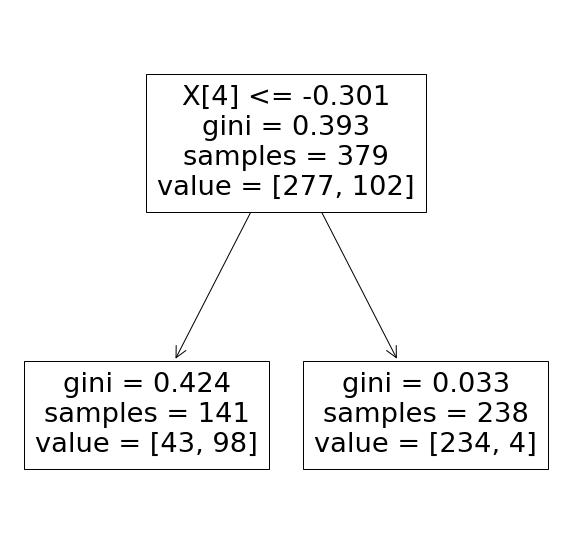

In [19]:
fig = plt.figure(figsize = (10,10))
tree.plot_tree(DT)

# Sensitivity, specificity and accuracy

In [20]:
def sensitivity_specificity_accuracy(training_target_data):
    # True positive
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    TP_count = 0
    for i in range(len(truth)):
        if test_result[i] :
            if test_result[i] == truth[i]:
                TP_count = TP_count + 1
    TP_count

    # False positive
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    FP_count = 0
    for i in range(len(truth)):
        if test_result[i] :
            if test_result[i] != truth[i]:
                FP_count = FP_count + 1
    FP_count

    # False Negative
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    FN_count = 0
    for i in range(len(truth)):
        if test_result[i] == 0:
            if test_result[i] != truth[i]:
                FN_count = FN_count + 1
    FN_count

    # True Negative
    truth = training_target_data.reshape([training_target_data.shape[0],])
    test_result = model_outputs
    TN_count = 0
    for i in range(len(truth)):
        if test_result[i] == 0:
            if test_result[i] == truth[i]:
                TN_count = TN_count + 1
    TN_count


    sensitivity = TP_count / (TP_count + FN_count)
    specificity = TN_count / (TN_count + FP_count)
    accuracy = sum(truth == test_result) / len(truth)
    

    return sensitivity, specificity, accuracy

In [21]:
y_test

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [22]:
training_target_data = y_test
sensitivity, specificity, accuracy = sensitivity_specificity_accuracy(training_target_data)

In [23]:
sensitivity

1.0

In [24]:
specificity

0.8307692307692308

In [25]:
accuracy

0.8842105263157894

In [26]:
print('accuracy:', accuracy, 'sensitivity:', sensitivity, 'specificity:', specificity)

accuracy: 0.8842105263157894 sensitivity: 1.0 specificity: 0.8307692307692308


# Cross validation

In [36]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [52]:
### decision_value = x1 * weight1 + bias

train_predict = cross_val_predict(DT_reg, x_train, y_train, cv = 3, method='predict_proba')
train_predict_result = cross_val_predict(DT_reg, x_train, y_train, cv = 3)

np.set_printoptions(suppress=True)
train_predict_result
#train_predict = train_predict.reshape([len(train_predict), 1])

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

In [52]:
y_train = y_train.reshape([len(y_train), 1])
y_train

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [42]:
p = precision_score(y_train, train_predict_result, average='micro')
r = recall_score(y_train, train_predict_result, average='micro')
f1 = f1_score(y_train, train_predict_result, average='micro')

In [43]:
p  # precision = TP / (TP + FP), the accuracy of positive prediction

0.8654353562005277

In [44]:
r # recall = sensitivity = TP / (TP + FN), true positive rate

0.8654353562005277

In [45]:
f1

0.8654353562005277

In [46]:
print('Fi:', f1, 'sensitivity (recall):', r, 'precision:', p)

Fi: 0.8654353562005277 sensitivity (recall): 0.8654353562005277 precision: 0.8654353562005277


In [54]:

from sklearn.metrics import roc_curve, roc_auc_score

In [56]:
fpr, tpr, _ = roc_curve(y_train, train_predict[:,1])

In [94]:
### sensitivity = true positive rate
### specificity = true negative rate = 1 - false negative rate

Text(0, 0.5, 'true positive rate')

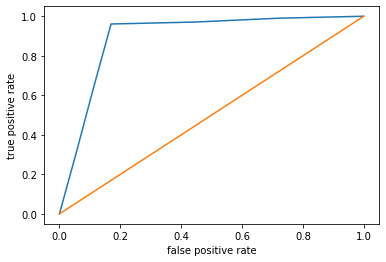

In [58]:
## ROC curve, reciever operating characteristic (fpr vs tpr)


plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')


In [61]:
auc = roc_auc_score(y_train, train_predict[:,1])
auc

0.8956077015643804

# Grid search

In [70]:
from sklearn.model_selection import GridSearchCV
train_predict_result = train_predict_result.reshape([train_predict_result.shape[0],1])
y_train = y_train.reshape([y_train.shape[0], 1])
grid_values = {'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3,4,5], 'max_leaf_nodes': [2,3,4,5]}
grid_search = GridSearchCV(DT_reg, param_grid = grid_values, cv = 10, return_train_score = True)
grid_search.fit(y_train, train_predict_result)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [2, 3, 4, 5]},
             return_train_score=True)

In [71]:
y_train.shape

(379, 1)

In [72]:
train_predict_result.size

379

In [73]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2}

In [74]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)